In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

%matplotlib inline

# Task Breakdown

Download the NSL-KDD dataset (get the .csv file)
You are to create a model to classify the data into whether normal or abnormal

1. Preprocessing

    a. Convert all textual fields into numeric
    
    b. Split data into training and test sets
    
    c. Do feature selection using correlation matrix to determine which features are best for predictors (watch video I sent to your class)
    
    
2.  CLASSIFICATION

    a. Use DecisionTree Classifier to train the model. 
    
    b. Test the model using the test data and measure it accuracy
    
    c. Do use the KNN, and SVM and compare the accuracy of performances and state which of them perform best

In [2]:
# Load NSL-KKD dataset
data = pd.read_csv('nslkdd.csv')

In [3]:
# Read first 5 rows
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [4]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [5]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1. Preprocessing

### a. Convert all textual fields into numeric

textual_fields = ('protocol_type', 'service', 'flag', 'class')

In [6]:
# Check unique values in 'protocol_type' column
data.protocol_type.unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [7]:
# Convert 'protocol_type' categories to numerical values
le_protocol_type = LabelEncoder()
le_protocol_type.fit(data.protocol_type)

LabelEncoder()

In [8]:
# Confirm the categories that are being converted
le_protocol_type.classes_

array(['icmp', 'tcp', 'udp'], dtype=object)

In [9]:
# Replace categorical values with numerical values
data.protocol_type = le_protocol_type.transform(data.protocol_type)

In [10]:
# Check unique values in 'service' column
data.service.unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'], dtype=object)

In [11]:
# Convert 'service' categories to numerical values
le_service = LabelEncoder()
le_service.fit(data.service)

LabelEncoder()

In [12]:
# Confirm the categories that are being converted
le_service.classes_

array(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns',
       'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i',
       'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher',
       'hostnames', 'http', 'http_443', 'imap4', 'iso_tsap', 'klogin',
       'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
       'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
       'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
       'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc',
       'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urp_i',
       'uucp', 'uucp_path', 'vmnet', 'whois'], dtype=object)

In [13]:
# Replace categorical values with numerical values
data.service = le_service.transform(data.service)

In [14]:
# Check unique values in 'flag' column
data.flag.unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [15]:
# Convert 'flag' categories to numerical values
le_flag = LabelEncoder()
le_flag.fit(data.flag)

LabelEncoder()

In [16]:
# Confirm the categories that are being converted
le_flag.classes_

array(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
       'SF', 'SH'], dtype=object)

In [17]:
# Replace categorical values with numerical values
data.flag = le_flag.transform(data.flag)

In [18]:
# Check unique values in 'class' column
data['class'].unique()

array(['anomaly', 'normal'], dtype=object)

In [19]:
# Convert 'protocol_type' categories to numerical values
le_class = LabelEncoder()
le_class.fit(data['class'])

LabelEncoder()

In [20]:
# Confirm the categories that are being converted
le_class.classes_

array(['anomaly', 'normal'], dtype=object)

In [21]:
# Replace categorical values with numerical values
data['class'] = le_class.transform(data['class'])

In [22]:
# Read first 5 rows
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


### b. Split data into training and test sets

In [23]:
# Divide data into input(X) and output(y) values
X = data.iloc[:, :41].values
y = data.iloc[:, 41].values

In [24]:
# Split data into training(70%) and test(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### c. Do feature selection using correlation matrix to determine which features are best for predictors

<AxesSubplot:>

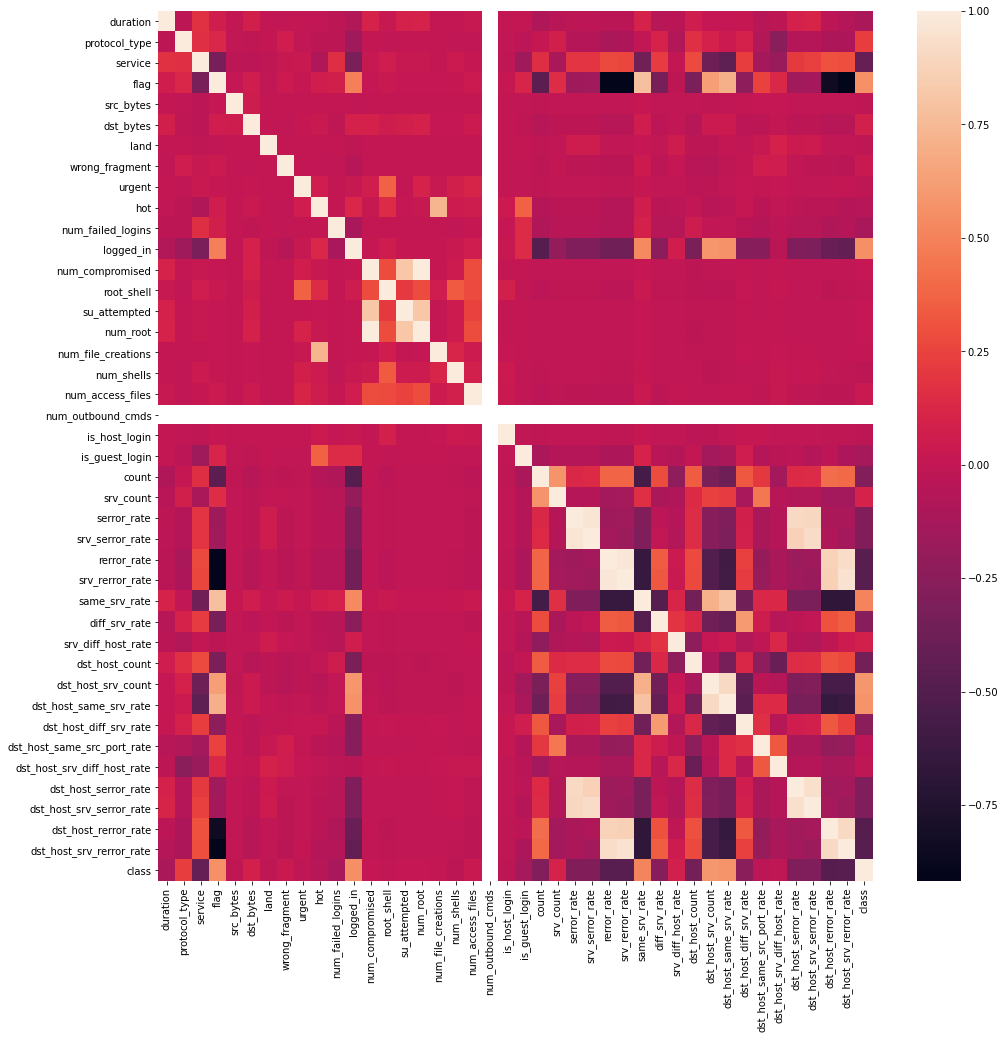

In [25]:
# Plot graph to show correlation between each column
corr = data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr)

In [26]:
# Get columns with correlation > 0.5 with 'class' column (the column to be predicted)
abs_corr = corr.abs()
selected_columns = []

for column in abs_corr.columns:
    if abs_corr.loc['class', column] > 0.5:
        if column == 'class':
            continue
        else:
            selected_columns.append(column)

selected_columns

['flag',
 'logged_in',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [27]:
X = data[selected_columns]

In [28]:
# Split data into training(70%) and test(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 2. CLASSIFICATION

### a. Use DecisionTree Classifier to train the model.

In [29]:
tree = DecisionTreeClassifier()

In [30]:
# Train the model with a decision tree classifier algorithm
dtc_model = tree.fit(X_train, y_train)

### b. Test the model using the test data and measure it accuracy

In [31]:
# Test the decision tree model
prediction = dtc_model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, prediction)
print('The models accuracy is', accuracy)

The models accuracy is 0.8769958604376109


### c. Do use the KNN, and SVM and compare the accuracy of performances and state which of them perform best

In [33]:
knn = KNeighborsClassifier(n_neighbors=8)

In [34]:
# Train the model with a KNN algorithm
knn_model = knn.fit(X_train, y_train)

In [35]:
# Test the KNN tree model
prediction = knn_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, prediction)
print('The models accuracy is', accuracy)

The models accuracy is 0.8537847427557658


In [37]:
svm = SVC()

In [38]:
# Train the model with a SVM algorithm
svm_model = svm.fit(X_train, y_train)

In [39]:
# Test the SVM tree model
prediction = knn_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, prediction)
print('The models accuracy is', accuracy)

The models accuracy is 0.8537847427557658
